In [1]:
from front_tracking_toolkit.experiment import Experiment
from front_tracking_toolkit.preprocess.preprocess import get_default_processing_opts, process_dataset
from front_tracking_toolkit.preprocess.viz import visualize_frames

In [2]:
exp = Experiment(r'C:\Users\Josh\git\front_tracking_toolkit\front_tracking_toolkit\example_experiment.yaml')
exp.describe()

Experiment Configuration:
Property                  Value
------------------------  ---------------------------------------------------------
basedir                   E:\Flow Pictures - complete data set\Flow Images\analysis
tracking_pattern          {subject}/{stain}/vf.csv
processed_images_pattern  processed/{subject}/{stain}/*.tif


Experiment Metadata:
      subject  stain      scale_factor  scale_units    genotype               exclude
--  ---------  -------  --------------  -------------  ---------------------  ---------
 0         10  ova           0.0102462  mm             Twist CKO+             False
 1         31  ova           0.0102231  mm             Twist CKO+             False
 2         47  ova           0.0102927  mm             Twist CKO+             False
 3         84  ova           0.0102231  mm             Twist CKO+             False
 4        118  ova           0.0102462  mm             Twist CKO+             False
 5        126  ova           0.0102001  mm    

  - Loading images...
    -> Found 61 images
  - Normalizing image intensity
    -> Stretching from [0.0, 238.0] -> [0, 255]
  - Correcting intensity fluctuations...


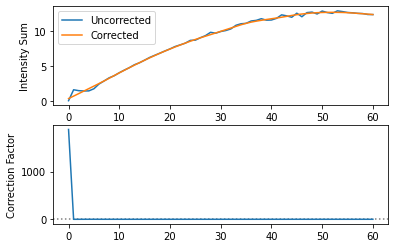

In [4]:
sample = exp.samples[0]

opts = get_default_processing_opts()
opts['dry'] = True
opts['reg']['enabled'] = False
frames = process_dataset(sample.get_images(), opts)
visualize_frames(frames)

In [3]:
opts

{'dry': True,
 'crop': {},
 'inorm': {'enabled': True,
  'kwargs': {'exclude_outliers': False, 'threshold': 3.5}},
 'icorr': {'enabled': True},
 'reg': {'enabled': True, 'kwargs': {'reference': 'previous'}},
 'dest': 'processed'}

In [3]:
with MatlabSession() as engine:
    run_front_tracking(engine, list(exp.images.values())[0], 'test')

Adding "c:\users\josh\git\front_tracking_toolkit\matlab" to matlab path
Adding "c:\users\josh\git\front_tracking_toolkit\matlab\FrontTrackingWithFlowRelease" to matlab path
Adding "c:\users\josh\git\front_tracking_toolkit\matlab\helpers" to matlab path


In [3]:
results = exp.load_tracking_results()
results

,t,fi,x,y,vx,vy,wx,wy,th,subject,stain,vm
0,480,1,441.343170,532.223694,-0.053760,-0.007965,-0.053760,-0.007965,7.399849,10,ova,0.054347
1,480,1,441.435181,531.602661,NaN,NaN,NaN,NaN,NaN,10,ova,NaN
2,480,1,441.575623,530.967102,NaN,NaN,NaN,NaN,NaN,10,ova,NaN
3,480,1,441.764465,530.318420,-0.051465,-0.016758,-0.051465,-0.016758,0.005361,10,ova,0.054125
4,480,1,442.001617,529.658813,NaN,NaN,NaN,NaN,NaN,10,ova,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
199199,3540,273,1683.691895,621.119202,NaN,NaN,NaN,NaN,NaN,10,ova,NaN
199200,3540,273,1683.528687,620.972595,NaN,NaN,NaN,NaN,NaN,10,ova,NaN
199201,3540,273,1683.409668,620.850098,0.006142,-0.005384,0.006142,-0.005384,18.913385,10,ova,0.008168
199202,3540,273,1683.335205,620.751892,NaN,NaN,NaN,NaN,NaN,10,ova,NaN


In [4]:
from front_tracking_toolkit.tracking.viz import make_front_areas_movie, make_front_lines_movie
from front_tracking_toolkit.io.image import load_images
fronts10 = results.groupby(['t', 'fi'])
images = load_images(list(exp.images.values())[0])
scale = exp.metadata.loc[0]['scale_factor']

In [5]:
make_front_areas_movie(images, fronts10, '.', '10_ova_areas', 1.0)
make_front_lines_movie(images, fronts10, '.', '10_ova_lines', 1.0)

In [8]:
exp.metadata.loc[0]['scale_factor']

0.010246190744920992

In [10]:
fronts10

In [12]:
import numpy as np
x = np.repeat(np.zeros((5, 10, 10), dtype='bool')[..., np.newaxis], 3, axis=3)
x.shape

(5, 10, 10, 3)